In [1]:
# pip install -U multidimensional-wilcoxon-mann-whitney

In [4]:
from multidimensional_wilcoxon_mann_whitney import multidimensional_ranksum
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

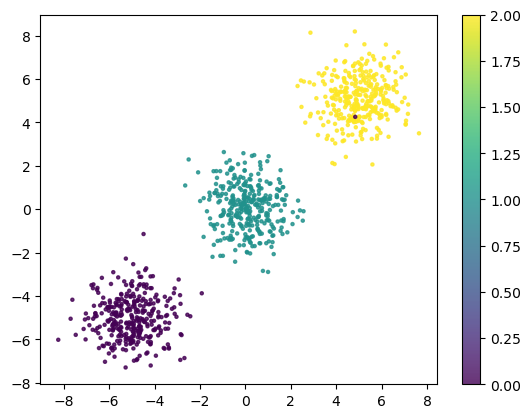

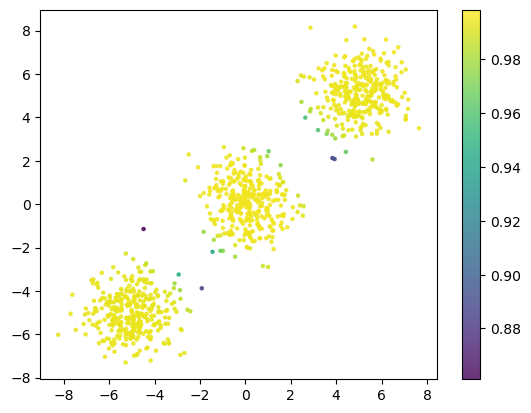

'AvgU 0.9932743100426723'

In [9]:
n_samples = 1000
centers = [(-5, -5), (0, 0), (5, 5)]
X, y = make_blobs(n_samples=n_samples, centers=centers, shuffle=False, random_state=42)
y[-1]=0
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8, s=5)
plt.colorbar()
plt.show()

argsorts, U =  multidimensional_ranksum(X,y)

plt.scatter(X[:, 0], X[:, 1], c=U, alpha=0.8, s=5)
plt.colorbar()
plt.show()
display(f"AvgU {np.mean(U)}");

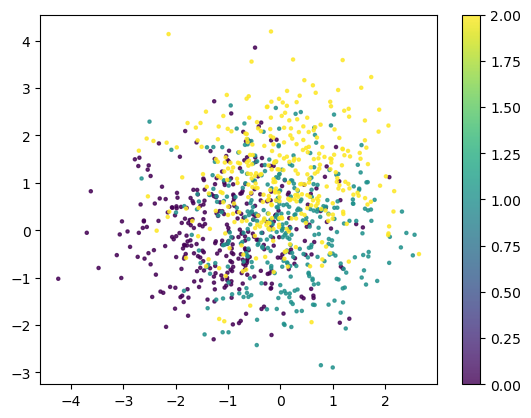

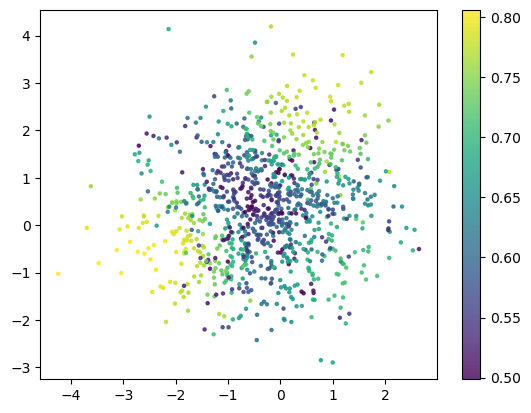

'AvgU 0.6430842522640441'

In [11]:
n_samples = 1000
centers = [(-1,  0), (0, 0), (0, 1)]
X, y = make_blobs(n_samples=n_samples, centers=centers, shuffle=False, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8, s=5)
plt.colorbar()
plt.show()

argsorts, U =  multidimensional_ranksum(X, y)

plt.scatter(X[:, 0], X[:, 1], c=U, alpha=0.8, s=5)
plt.colorbar();

plt.show()
display(f"AvgU {np.mean(U)}")